In [6]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('H:/Spring_2020/AI/project/parkinsons.data.csv', index_col=0)

x = df.drop('status', axis=1)
y = df['status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)


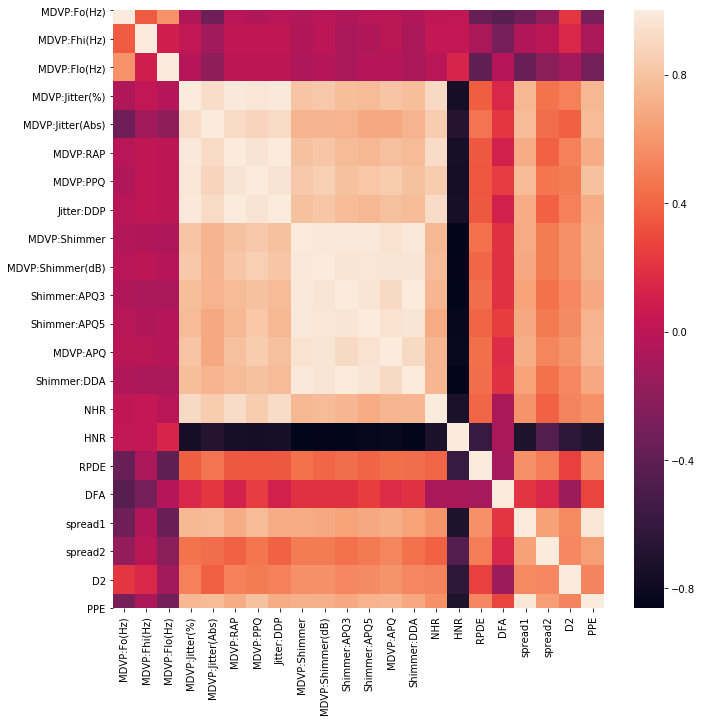

In [7]:
#correlation with Pearson's correlation.
numerical_x_train = x_train[x_train.select_dtypes([np.number]).columns]
vs_constant = VarianceThreshold(threshold=0)
vs_constant.fit(numerical_x_train)
correlated_features = set()
correlated_matrix = numerical_x_train.corr()
plt.figure(figsize=(11,11))
sns.heatmap(correlated_matrix)

#correlation with Kendall's correlation.
numerical_x_train_K = x_train[x_train.select_dtypes([np.number]).columns]
vs_constant_K = VarianceThreshold(threshold=0)
vs_constant_K.fit(numerical_x_train_K)
correlated_features_K = set()
correlated_matrix_K = numerical_x_train_K.corr(method = 'kendall')

#correlation with Spearman's correlation.
numerical_x_train_S = x_train[x_train.select_dtypes([np.number]).columns]
vs_constant_S = VarianceThreshold(threshold=0)
vs_constant_S.fit(numerical_x_train_S)
correlated_features_S = set()
correlated_matrix_S = numerical_x_train_S.corr(method = 'spearman')

In [5]:
#Pearson's highly correlated features
for i in range(len(correlated_matrix .columns)):
    for j in range(i):
        if abs(correlated_matrix.iloc[i, j]) > 0.8:
            colname = correlated_matrix.columns[i]
            correlated_features.add(colname)
correlated_features_list = list(correlated_features)
print(len(correlated_features_list),'|| Perason --> ',correlated_features_list, 'type: ')

#Kendall's highly correlated features
for i in range(len(correlated_matrix_K .columns)):
    for j in range(i):
        if abs(correlated_matrix_K.iloc[i, j]) > 0.8:
            colname = correlated_matrix_K.columns[i]
            correlated_features_K.add(colname)
correlated_features_list_K = list(correlated_features_K)
print('\n\n',len(correlated_features_list_K),'|| Kendalls --> ',correlated_features_list_K, 'type: ')


#Spearman's highly correlated features
for i in range(len(correlated_matrix_S .columns)):
    for j in range(i):
        if abs(correlated_matrix_S.iloc[i, j]) > 0.8:
            colname = correlated_matrix_S.columns[i]
            correlated_features_S.add(colname)
correlated_features_list_S = list(correlated_features_S)
print('\n\n',len(correlated_features_list_S),'|| Spearmans --> ',correlated_features_list_S, 'type: ')


#########  Statistical Methods for features selection #########
from sklearn.feature_selection import mutual_info_classif, chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

#ANOVA
select_k = 11 #number of features we want to retain.
numerical_x_train_A = x_train[x_train.select_dtypes([np.number]).columns]
# create the SelectKBest with the mutual info(ANOVA) strategy.
selection_A = SelectKBest(mutual_info_classif, k=select_k).fit(numerical_x_train_A, y_train)
features_A = x_train.columns[selection_A.get_support()]
print('\n\n',len(features_A),'|| ANNOVA --> ', features_A)

#Chi Square
select_C = 11  
selection_C = SelectKBest(chi2, k=select_C).fit(abs(x_train), y_train)
features_C = x_train.columns[selection_C.get_support()]
print('\n\n',len(features_C),'  || Chi Squared --> ', features_C)





13 || Perason -->  ['MDVP:Shimmer', 'MDVP:PPQ', 'Shimmer:DDA', 'NHR', 'HNR', 'MDVP:RAP', 'PPE', 'Jitter:DDP', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:Shimmer(dB)', 'MDVP:Jitter(Abs)', 'MDVP:APQ'] type: 


 10 || Kendalls -->  ['MDVP:PPQ', 'Shimmer:DDA', 'MDVP:RAP', 'PPE', 'Jitter:DDP', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:Shimmer(dB)', 'MDVP:Jitter(Abs)', 'MDVP:APQ'] type: 


 14 || Spearmans -->  ['MDVP:Fhi(Hz)', 'MDVP:Shimmer', 'MDVP:PPQ', 'Shimmer:DDA', 'NHR', 'HNR', 'MDVP:RAP', 'PPE', 'Jitter:DDP', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:Shimmer(dB)', 'MDVP:Jitter(Abs)', 'MDVP:APQ'] type: 


 11 || ANNOVA -->  Index(['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)', 'MDVP:Shimmer',
       'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'spread1',
       'spread2', 'PPE'],
      dtype='object')


 11   || Chi Squared -->  Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Shimmer(dB)',
       'Shimmer:DDA', 'NHR', 'HNR', 'spread1', 'spread2', 'D2', 'PPE'],
      dt

In [5]:
from sklearn.svm import SVC
#print('before removal of extra features: train = ',x_train.columns,'\ntest = ', x_test.columns)
x_train_2 = x_train[correlated_features_list]
x_test_2 = x_test[correlated_features_list]
#print('\n\nafter removal of extra features: train = ',x_train_2.columns,'\ntest = ', x_test_2.columns)

#Kendal:
x_train_Ke = x_train[correlated_features_list_K]
x_test_Ke = x_test[correlated_features_list_K]

#Spearman
x_train_Sp = x_train[correlated_features_list_S]
x_test_Sp = x_test[correlated_features_list_S]

#ANOVA
x_train_AN = x_train[features_A]
x_test_AN = x_test[features_A]

#Chi Sqaure
x_train_Ch = x_train[features_C]
x_test_Ch = x_test[features_C]

In [59]:
# svclassifier = SVC(kernel='linear')
# svclassifier.fit(x_train_2, y_train)

In [6]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train_2, y_train)
print('with ',len(x_test_2.columns),' test columns the output is ',model.score(x_test_2, y_test))

with  12  test columns the output is  0.7627118644067796


C:\Users\bxj96\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [7]:
model_Ke = SVC()
model_Ke.fit(x_train_Ke, y_train)
print('with ',len(x_test_Ke.columns),' test columns the output is ',model_Ke.score(x_test_Ke, y_test))

with  9  test columns the output is  0.7288135593220338


C:\Users\bxj96\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [8]:
model_Sp = SVC()
model_Sp.fit(x_train_Sp, y_train)
print('with ',len(x_test_Sp.columns),' test columns the output is ',model_Sp.score(x_test_Sp, y_test))

with  13  test columns the output is  0.7966101694915254


C:\Users\bxj96\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [9]:
model_AN = SVC()
model_AN.fit(x_train_AN, y_train)
print('with ',len(x_test_AN.columns),' test columns the output is ',model_AN.score(x_test_AN, y_test))

with  11  test columns the output is  0.7457627118644068


C:\Users\bxj96\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [10]:
model_Ch = SVC()
model_Ch.fit(x_train_Ch, y_train)
print('with ',len(x_test_Ch.columns),' test columns the output is ',model_Ch.score(x_test_Ch, y_test))

with  11  test columns the output is  0.7457627118644068


C:\Users\bxj96\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
# SVM Kernel = rbf

In [11]:
#Pearson
model = SVC(kernel='rbf', gamma=0.7)
model.fit(x_train_2, y_train)
print('with ',len(x_test_2.columns),' test columns the output is ',model.score(x_test_2, y_test))

with  12  test columns the output is  0.7627118644067796


In [12]:
#Spearman
model_Sp = SVC(kernel='rbf', gamma=0.7)
model_Sp.fit(x_train_Sp, y_train)
print('with ',len(x_test_Sp.columns),' test columns the output is ',model_Sp.score(x_test_Sp, y_test))

with  13  test columns the output is  0.7457627118644068


In [13]:
#Kendall
model_Ke = SVC(kernel='rbf', gamma=0.7)
model_Ke.fit(x_train_Ke, y_train)
print('with ',len(x_test_Ke.columns),' test columns the output is ',model_Ke.score(x_test_Ke, y_test))

with  9  test columns the output is  0.7288135593220338


In [14]:
#ANNOVA
model_AN = SVC(kernel='rbf', gamma=0.7)
model_AN.fit(x_train_AN, y_train)
print('with ',len(x_test_AN.columns),' test columns the output is ',model_AN.score(x_test_AN, y_test))

with  11  test columns the output is  0.7288135593220338


In [15]:
#Chi Squared
model_Ch = SVC(kernel='rbf', gamma=0.7)
model_Ch.fit(x_train_Ch, y_train)
print('with ',len(x_test_Ch.columns),' test columns the output is ',model_Ch.score(x_test_Ch, y_test))

with  11  test columns the output is  0.7288135593220338
